In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams9.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,NB
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,NB
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,NB
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,NB
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,NB


In [3]:
len(df)

18500

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500 entries, 0 to 18499
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18500 non-null  int64  
 1   N_Person           18500 non-null  int64  
 2   Xcenter            18500 non-null  float64
 3   Ycenter            18500 non-null  float64
 4   PerXmin            18500 non-null  float64
 5   PerYmin            18500 non-null  float64
 6   PerXmax            18500 non-null  float64
 7   PerYmax            18500 non-null  float64
 8   N_Handgun          18500 non-null  int64  
 9   HgXcenter          18500 non-null  float64
 10  HgYcenter          18500 non-null  float64
 11  HgXmin             18500 non-null  float64
 12  HgYmin             18500 non-null  float64
 13  HgXmax             18500 non-null  float64
 14  HgYmax             18500 non-null  float64
 15  Intersection       18500 non-null  object 
 16  Included_Center    185

In [5]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14253
Ycenter              14234
PerXmin              14261
PerYmin              14258
PerXmax              14261
PerYmax              14238
N_Handgun                5
HgXcenter             7303
HgYcenter             7301
HgXmin                7305
HgYmin                7305
HgXmax                7305
HgYmax                7304
Intersection             9
Included_Center          2
Intersection_Area     8471
Hg_Area               7305
Distance             18500
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

0    13015
1     5485
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,NB,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,NB,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,NB,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,NB,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,NB,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500 entries, 0 to 18499
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18500 non-null  int64  
 1   N_Person                      18500 non-null  int64  
 2   Xcenter                       18500 non-null  float64
 3   Ycenter                       18500 non-null  float64
 4   PerXmin                       18500 non-null  float64
 5   PerYmin                       18500 non-null  float64
 6   PerXmax                       18500 non-null  float64
 7   PerYmax                       18500 non-null  float64
 8   N_Handgun                     18500 non-null  int64  
 9   HgXcenter                     18500 non-null  float64
 10  HgYcenter                     18500 non-null  float64
 11  HgXmin                        18500 non-null  float64
 12  HgYmin                        18500 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'NB', 0: 'MLP'}


In [10]:
print(df2['Ground_Truth'].value_counts())

0    13015
1     5485
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500 entries, 0 to 18499
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18500 non-null  int64  
 1   N_Person                      18500 non-null  int64  
 2   Xcenter                       18500 non-null  float64
 3   Ycenter                       18500 non-null  float64
 4   PerXmin                       18500 non-null  float64
 5   PerYmin                       18500 non-null  float64
 6   PerXmax                       18500 non-null  float64
 7   PerYmax                       18500 non-null  float64
 8   N_Handgun                     18500 non-null  int64  
 9   HgXcenter                     18500 non-null  float64
 10  HgYcenter                     18500 non-null  float64
 11  HgXmin                        18500 non-null  float64
 12  HgYmin                        18500 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14800, 28) (14800,)
(3700, 28) (3700,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.8217717717717719
mean_test =  0.8208108108108109


,fit_time,score_time,test_score,train_score
0,0.059857,0.001992,0.829730,0.820946
1,0.059825,0.001995,0.822297,0.821471
2,0.058860,0.002989,0.826351,0.821021
3,0.058860,0.002988,0.825676,0.821096
4,0.058859,0.001992,0.824324,0.821622
5,0.058860,0.002989,0.820270,0.821922
6,0.058858,0.002990,0.814189,0.822222
7,0.058860,0.002992,0.819595,0.823874
8,0.058858,0.002991,0.808108,0.823048
9,0.058861,0.002987,0.817568,0.820495


In [15]:
# save the model to disk
filename = 'rfc_model_intersection_0.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9097522522522523
mean_test =  0.9072972972972974


,fit_time,score_time,test_score,train_score
0,0.103721,0.003989,0.914189,0.904580
1,0.096711,0.002993,0.908784,0.912838
2,0.099732,0.003962,0.914865,0.911261
3,0.102756,0.002990,0.912162,0.914264
4,0.098734,0.002995,0.908784,0.910736
5,0.098708,0.002992,0.899324,0.909910
6,0.103726,0.002988,0.895270,0.904880
7,0.099743,0.002985,0.906081,0.908634
8,0.100734,0.002990,0.902027,0.907057
9,0.099732,0.002989,0.911486,0.913363


In [15]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 785,  316],
        [  47, 2552]],

       [[2552,   47],
        [ 316,  785]]], dtype=int64)

                         feature  importance       std
25        Intersection_Up_center    0.000000  0.000000
23           Intersection_Inside    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
15               Included_Center    0.000474  0.001323
27         Intersection_Up_right    0.000769  0.002306
8                      N_Handgun    0.003192  0.005140
19      Intersection_Center_left    0.003258  0.009774
24  Intersection_No_intersection    0.005683  0.013144
13                        HgXmax    0.006295  0.016890
11                        HgXmin    0.008401  0.009135
9                      HgXcenter    0.012165  0.023964
1                       N_Person    0.018448  0.055344
20     Intersection_Center_right    0.019702  0.038618
17                       Hg_Area    0.021360  0.047782
16             Intersection_Area    0.027707  0.061000
0         

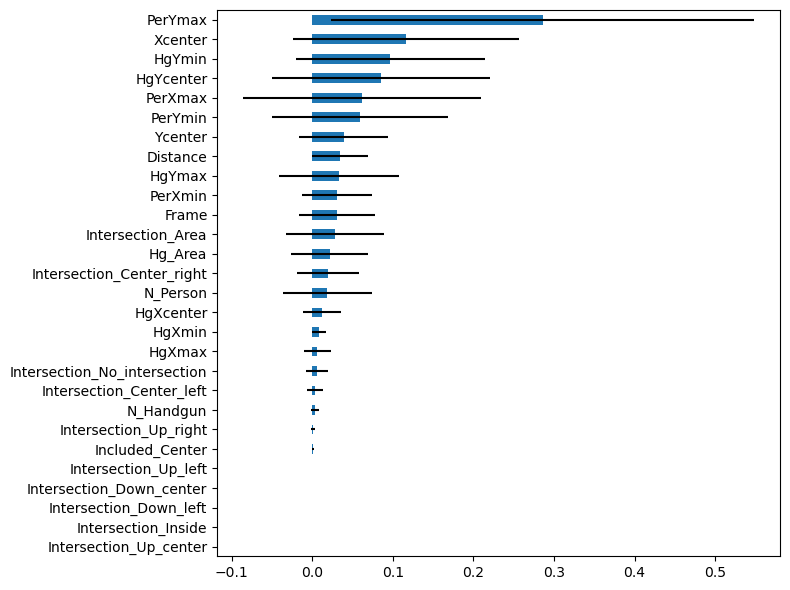

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2599
           1       0.94      0.71      0.81      1101

    accuracy                           0.90      3700
   macro avg       0.92      0.85      0.87      3700
weighted avg       0.91      0.90      0.90      3700



In [21]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18500 entries, 0 to 18499
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18500 non-null  int64  
 1   N_Person                      18500 non-null  int64  
 2   Xcenter                       18500 non-null  float64
 3   Ycenter                       18500 non-null  float64
 4   PerXmin                       18500 non-null  float64
 5   PerYmin                       18500 non-null  float64
 6   PerXmax                       18500 non-null  float64
 7   PerYmax                       18500 non-null  float64
 8   N_Handgun                     18500 non-null  int64  
 9   HgXcenter                     18500 non-null  float64
 10  HgYcenter                     18500 non-null  float64
 11  HgXmin                        18500 non-null  float64
 12  HgYmin                        18500 non-null  float64
 13  H

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86293189, -1.00660262,  0.38717311, -1.05771398,  0.40812423,
        -0.80168995,  0.35059181, -1.42452642, -0.49681502,  0.64947512,
        -1.25746198,  0.70202355, -1.17653419,  0.59550966, -1.33372065,
         1.17775073, -0.04920527, -0.63129514, -0.69627557,  2.66721486,
        -0.28380338, -0.01644212, -0.01039807, -0.53860712, -1.08418027,
        -0.11985662, -0.06162917, -0.13805492],
       [-1.86076336, -1.00660262,  0.38688746, -1.05712386,  0.4071422 ,
        -0.80000069,  0.35103726, -1.427271  , -0.49681502,  0.64787864,
        -1.25831572,  0.69901956, -1.17718521,  0.5953085 , -1.33477903,
         1.17775073, -0.04678087, -0.62537864, -0.69484738,  2.66721486,
        -0.28380338, -0.01644212, -0.01039807, -0.53860712, -1.08418027,
        -0.11985662, -0.06162917, -0.13805492],
       [-1.85859484, -1.00660262,  0.3875078 , -1.05927685,  0.40861101,
        -0.80405559,  0.35075634, -1.42326549, -0.49681502,  0.6476999 ,
        -1.25972921,  0.6989

In [21]:
print(scaler.mean_)

[8.59077622e+02 8.79621622e-01 3.92849841e+02 3.82387132e+02
 3.05633419e+02 2.46089290e+02 4.80066263e+02 5.18684975e+02
 2.98432432e-01 3.10635637e+02 3.12353736e+02 2.87279103e+02
 2.92822454e+02 3.33992172e+02 3.31885018e+02 4.18918919e-01
 9.26670113e+02 2.02166737e+03 2.31840859e+02 1.23243243e-01
 7.45405405e-02 2.70270270e-04 1.08108108e-04 2.24864865e-01
 5.40324324e-01 1.41621622e-02 3.78378378e-03 1.87027027e-02]


In [22]:
print(scaler.scale_)

[4.61142797e+02 8.73851906e-01 2.12177984e+02 6.88316378e+01
 2.19893417e+02 1.11871884e+02 2.12655814e+02 3.92564193e+01
 6.00691248e-01 1.52810090e+02 9.72639968e+01 1.52110667e+02
 9.91954833e+01 1.53998229e+02 9.59006505e+01 4.93382061e-01
 1.66130404e+03 1.80606356e+03 1.37474258e+02 3.28716209e-01
 2.62648526e-01 1.64376770e-02 1.03969429e-02 4.17493302e-01
 4.98371296e-01 1.18159195e-01 6.13959833e-02 1.35472918e-01]


In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [24]:
X_train.shape

(13875, 28)

In [25]:
y_train.value_counts()

0    9761
1    4114
Name: Ground_Truth, dtype: int64

In [26]:
X_test.shape

(4625, 28)

In [27]:
y_test.value_counts()

0    3254
1    1371
Name: Ground_Truth, dtype: int64

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[9.99999337e-01, 6.62655192e-07],
       [9.99998116e-01, 1.88374427e-06],
       [9.99968393e-01, 3.16074659e-05],
       ...,
       [9.99996385e-01, 3.61470077e-06],
       [1.00000000e+00, 1.86670102e-11],
       [9.99813953e-01, 1.86046588e-04]])

In [30]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[1307,   64],
        [  48, 3206]],

       [[3206,   48],
        [  64, 1307]]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3254
           1       0.96      0.95      0.96      1371

    accuracy                           0.98      4625
   macro avg       0.97      0.97      0.97      4625
weighted avg       0.98      0.98      0.98      4625



In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9886126126126126
Score test =  0.9757837837837838


In [35]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  1.0
Score test =  0.9626700411262259


In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))